# EDA

- Read the data dictionary.
- Determine what missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

In [1]:
# Import libraries here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pickle
pd.set_option('display.max_columns', None)

### 1. Read in data

In [2]:
# read in clean data fro my pickle
train = pickle.load(open("../assets/train_clean_eda.pkl", "rb"))

### 2. Visualize distribution of variables

In [48]:
# function to create histogram plots
def subplot_histogram(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (10,10),dpi = 90) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    colors = ["#5caccf", "#5caccf", "#76A08A", "#76A08A"]
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color = colors[i]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
    for i, title in enumerate(list_of_titles):
        ax[i].set(title=title)
    for i, xlabel in enumerate(list_of_xlabels):
        ax[i].set(xlabel=xlabel)
    plt.subplots_adjust(hspace=0.3)


Explore some quantitative variables.

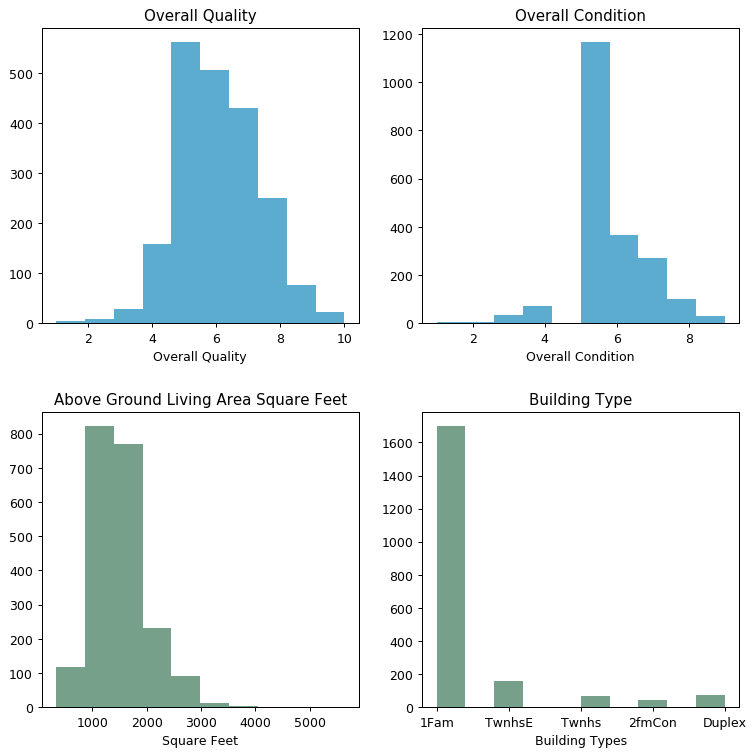

In [6]:
subplot_histogram(train, ["overall_qual", "overall_cond", "gr_liv_area", "bldg_type"],
            ["Overall Quality", "Overall Condition", "Above Ground Living Area Square Feet",  "Building Type"],
            ["Overall Quality", "Overall Condition", "Square Feet", "Building Types"])

__These graphs show:__
- Overall quality is pretty normally distributed.
- Overall condition is not normally distributed.
- Above ground liviing area has some outliers.
- Most properties are one family building types.

### 4. Look for outliers

Look at outliers with some boxplots.

In [49]:
# custom function for boxplots
def plot_boxplot(dataframe, list_of_columns, title):
    plt.figure(figsize=(6, 4), dpi=80)
    sns.boxplot(data = dataframe[list_of_columns], orient="h", palette = "Set2")
    plt.title(title, fontsize=18);

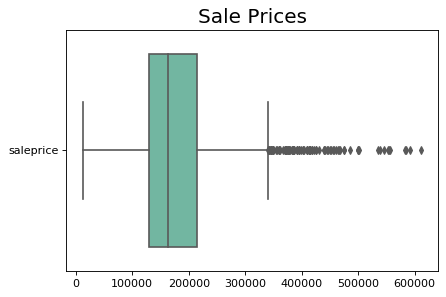

In [50]:
# Look at the distribution of sale prices
plot_boxplot(train, ["saleprice"], "Sale Prices")

Looks like there are quite some outliers in sale prices one standard deviation above the mean. 

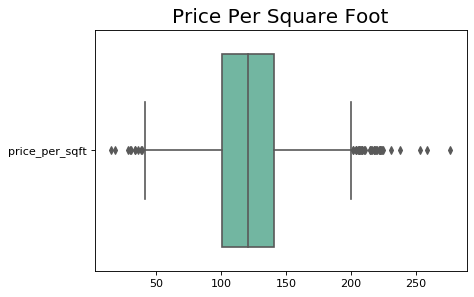

In [51]:
# Look at the distribution of price per square foot
# Look at the distribution of sale prices
plot_boxplot(train, ["price_per_sqft"], "Price Per Square Foot")

When we look at the distribution for price per square foot, it looks like the range for outliers above the mean shrinks a little, and we introduce some outliers below the mean.

### 5. Look at some basic correlations

In [52]:
# function to create scatterplot subplots
def subplot_scatter(dataframe, y_axis, list_of_x, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_x)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (10,10),dpi = 90) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_x): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[column],
                      dataframe[y_axis])
        # Set titles, labels, etc here for each subplot
    for i, title in enumerate(list_of_titles):
        ax[i].set(title=title)
    for i, xlabel in enumerate(list_of_xlabels):
        ax[i].set(xlabel=xlabel)
    plt.subplots_adjust(hspace=0.3)

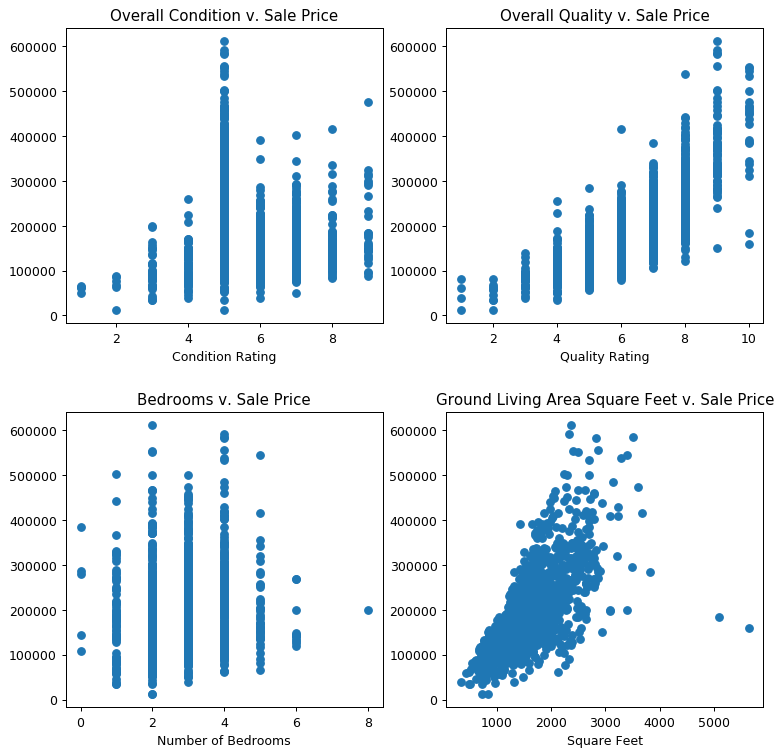

In [53]:
subplot_scatter(train, "saleprice",
               ["overall_cond", "overall_qual", "bedroom_abvgr", "gr_liv_area"],
               ["Overall Condition v. Sale Price", 
                "Overall Quality v. Sale Price", 
                "Bedrooms v. Sale Price", 
                "Ground Living Area Square Feet v. Sale Price"],
               ["Condition Rating", "Quality Rating", "Number of Bedrooms", "Square Feet"])

__These graphs show:__
- There is a slight correlation between overall condition and sale price.
- There is kind of a correlation between overall quality and sale price. The higher the rating, the higher the lowest sale price for the house.
- There is a slight correlation between number of bedrooms above grade and sale price. The more bedrooms, the higher the lowest sale price for the house in that category. But you can see that for each category, the sale prices range greatly.
- There is an exponential correlation between ground living area square feet and sale price. The higher the square footage, the higher the sale price. There are 2 outliers that have really big square feet and sold at relatively low prices.

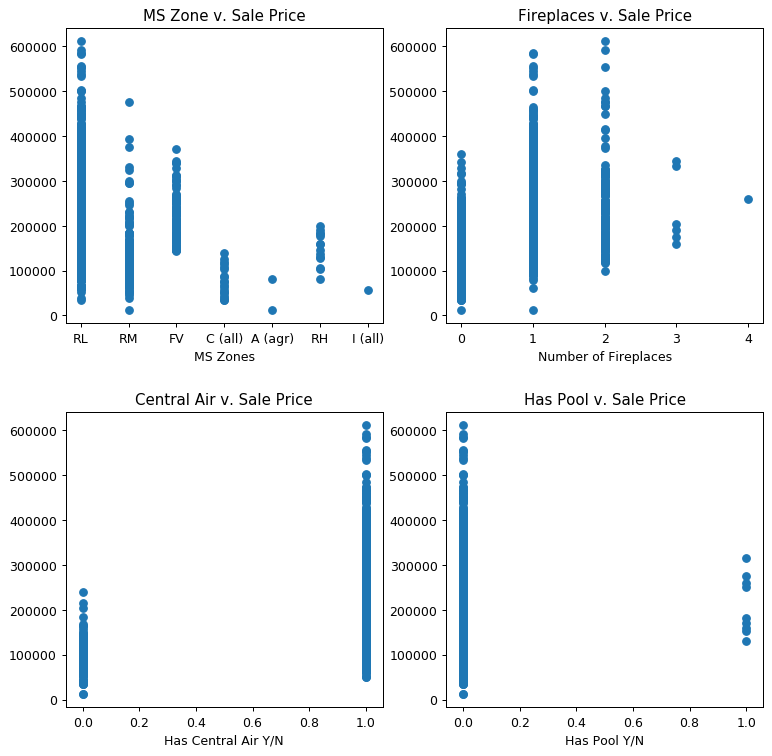

In [14]:
subplot_scatter(train, "saleprice",
               ["ms_zoning", "fireplaces", "central_air", "has_pool"],
               ["MS Zone v. Sale Price",  
                "Fireplaces v. Sale Price", 
                "Central Air v. Sale Price",
                "Has Pool v. Sale Price"],
               ["MS Zones", "Number of Fireplaces", "Has Central Air Y/N", "Has Pool Y/N"])

__These graphs show:__
- Certain MS zones have an overall higher sale price.
- There is kind of a correlation between number of fire places and sale price.
- Overall, houses with central air have a higher sale price than houses without central air.
- Overall, houses with a pool have a higher sale price than houses without a pool.

### 6. Look at the distribution of price per square foot by neighborhood

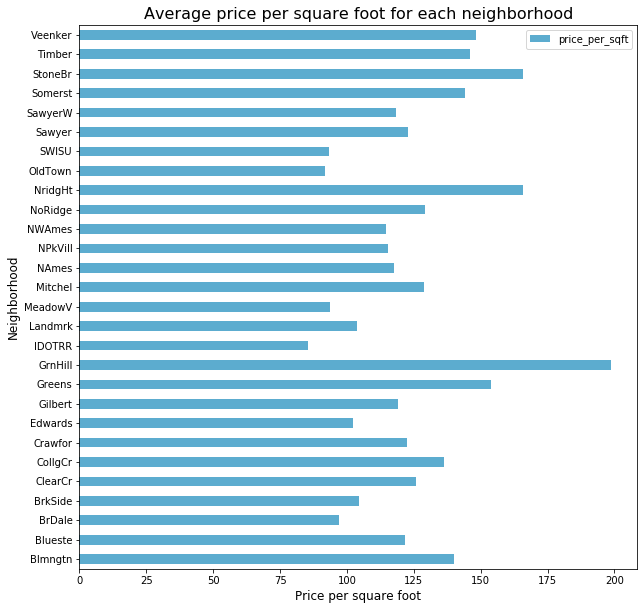

In [16]:
# plot a bar chart for price per square foot by neighborhood
df = train.groupby('neighborhood')[['price_per_sqft']].mean() # plot the mean of each neighborhood

ax = df.plot(kind='barh', figsize=(10,10), color="#5caccf", fontsize=10)
plt.title("Average price per square foot for each neighborhood", fontsize = 16)
plt.xlabel("Price per square foot", fontsize = 12)
plt.ylabel("Neighborhood", fontsize = 12);
plt.savefig('../plots/price_per_sqft.png')

This plot shows me that there are some neighborhoods that have a higher overall sale price than others. For example, the Northridge neighborhood has an overall higher sale price.

### 7. Create a correlation matrix and heatmap

In [17]:
# select the features that I think will impact housing prices
features = ["overall_cond", "overall_qual", "full_bath", 
            "bedroom_abvgr", "has_remodel","kitchen_qual", 
            "price_per_sqft", "year_built" ,  "yr_sold", 
            "gr_liv_area", "ms_zoning", "1st_flr_sf", 
            "central_air", "totrms_abvgrd", "fireplaces", 
            "has_pool", "saleprice","housing_stock" ]

condition_1 = list(train.columns[train.columns.str.contains("condition_1_")])

# append condition 1 columns to features list
features.extend(condition_1)

In [18]:
# create a new dataframe with these features
train_2 = train[features]

In [19]:
# build a correlation matrix of these features to sale price
corr_matrix = train_2.corr()[["saleprice"]]

In [20]:
# only select the features that are significantly correlated, above 0.5 or below -0.5
corr_matrix_sig = corr_matrix.loc[(corr_matrix["saleprice"] > 0.5) | (corr_matrix["saleprice"] < -0.5), :]

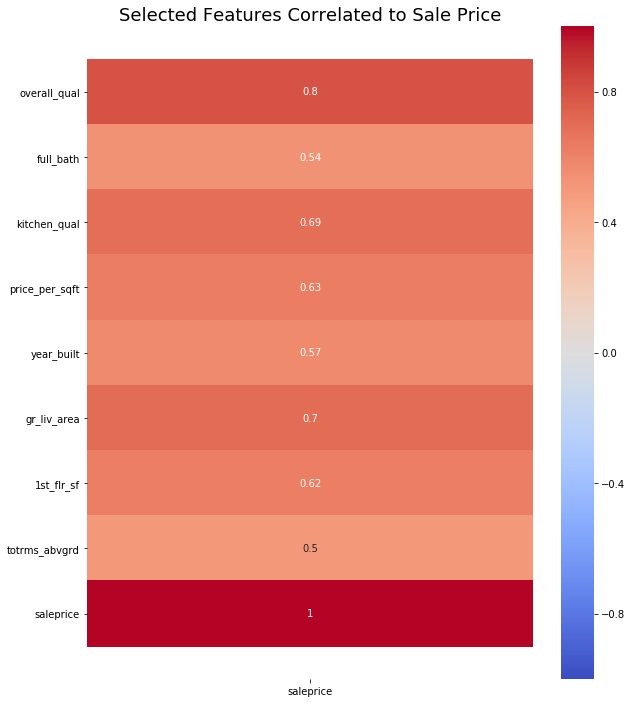

In [21]:
# plot heatmap
plt.figure(figsize = (10,12))
sns.heatmap(corr_matrix_sig, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# Source: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Selected Features Correlated to Sale Price", fontsize = 18)
plt.savefig('../plots/correlation.png')

I'll start building a model on features that have an absolute correlation value > 0.5 to saleprice. 


### 8. Write out clean dataset to csv for further visualization in R.

In [32]:
train.to_csv("../datasets/train_clean.csv")